In [20]:
from path import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from pathlib import Path
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [21]:
all_data = Path('all_wines.csv')
all_df = pd.read_csv(all_data)
all_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,4,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,red


In [22]:
# Missing Values
print(all_df.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
sulphates               0
alcohol                 0
ph                      0
quality                 0
id                      0
color                   0
dtype: int64


#### Filter to red wines only

In [23]:
red_df = all_df[all_df["color"] == "red"]
white_df = all_df[all_df["color"] == "white"]

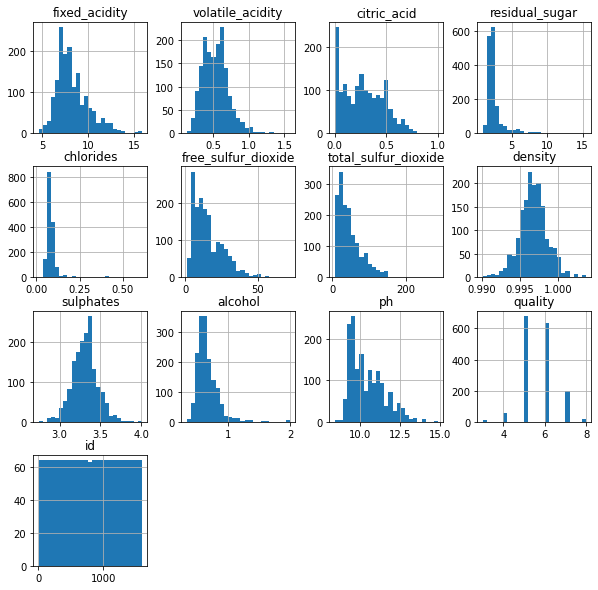

In [24]:
red_df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

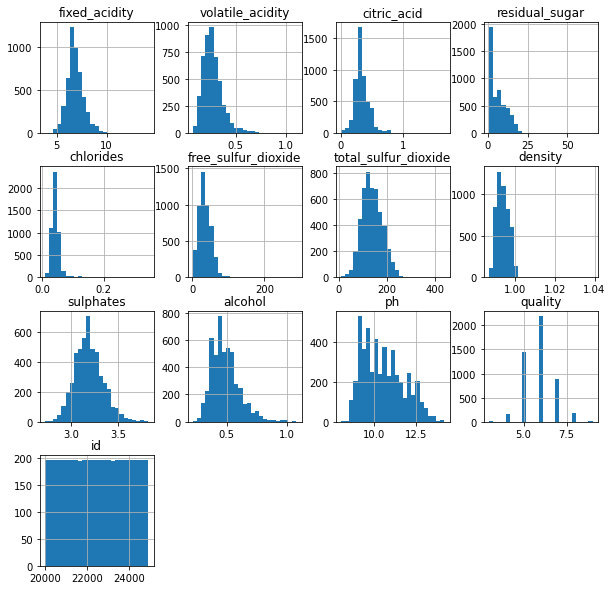

In [25]:
white_df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

In [26]:
# corr = red_df.corr()
# corr

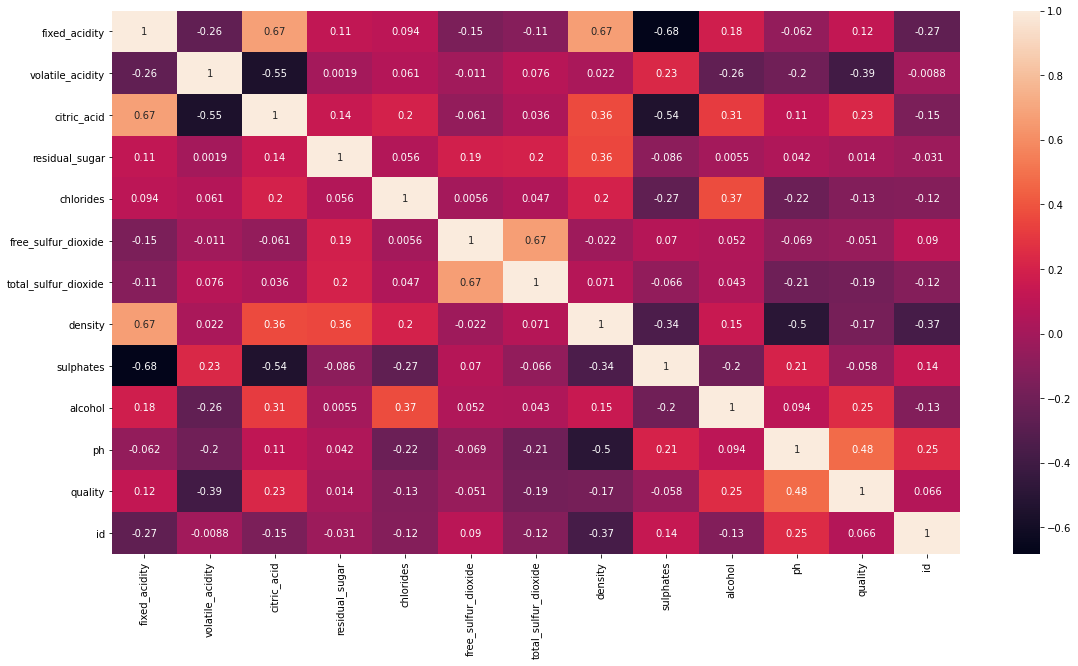

In [27]:
# ploting heatmap
plt.figure(figsize=[19,10])
sns.heatmap(red_df.corr(),annot=True)
plt.show()

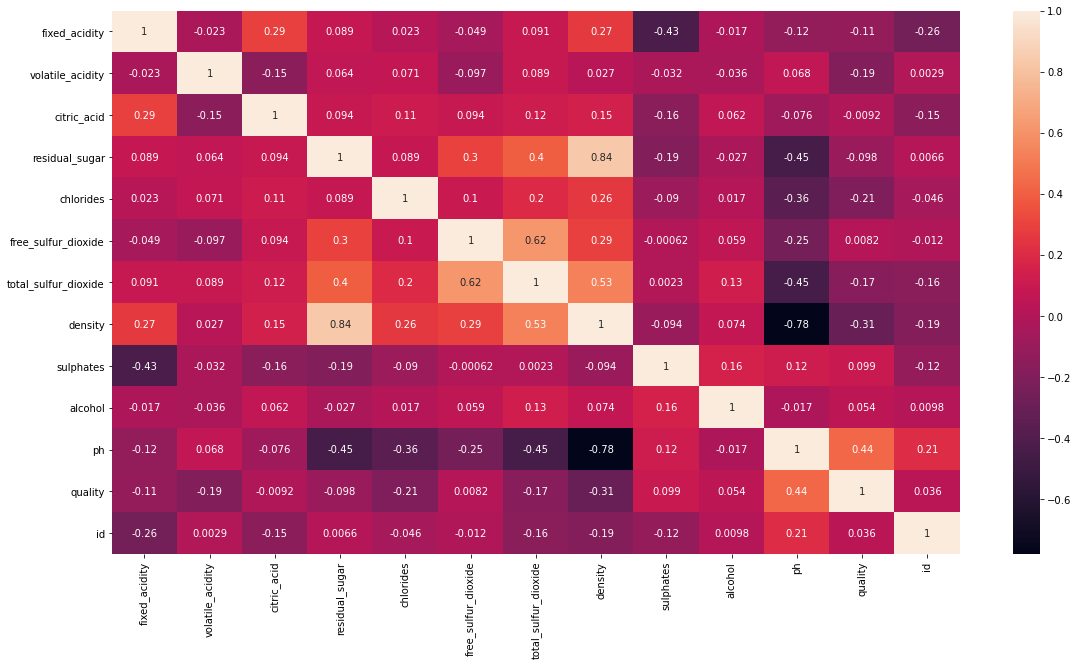

In [28]:
# ploting heatmap
plt.figure(figsize=[19,10])
sns.heatmap(white_df.corr(),annot=True)
plt.show()

#### Categorize quality to >=7 as Good and < 7 and Not good

In [37]:
# red_df['quality_2'] = (red_df['quality'] >=  7).astype(int)
red_df['quality_2'] = [ 1 if x>=7 else 0 for x in red_df.quality]
red_df.head()

C:\Users\lindgp1\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id,color,quality_2,Good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,red,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3,red,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,4,red,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,red,0,0


In [39]:
# white_df['quality_2'] = (white_df['quality'] >=  7).astype(int)
white_df['quality_2'] = [ 1 if x>=7 else 0 for x in white_df.quality]
white_df.head()

C:\Users\lindgp1\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id,color,quality_2
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,20001,white,0
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,20002,white,0
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,20003,white,0
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,20004,white,0
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,20005,white,0


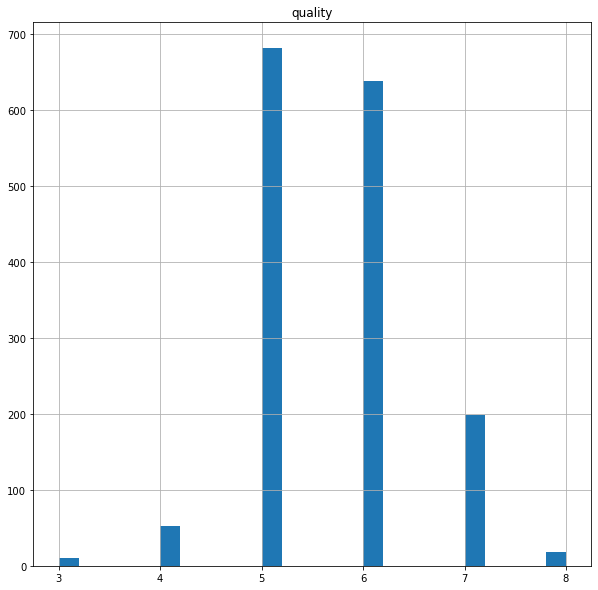

In [33]:
red_df.hist(bins=25,figsize=(10,10),column='quality')
# display histogram
plt.show()

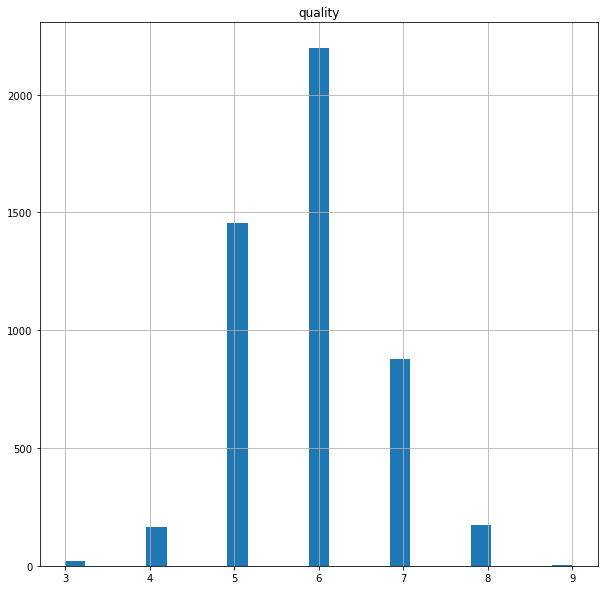

In [34]:
white_df.hist(bins=25,figsize=(10,10),column='quality')
# display histogram
plt.show()